I propose to make an NLP pipeline that will ultimately classify legal testimony into topics.

Problem:
Unreliable speech from public officials and news networks have reached a head in our nation.  News outlets, law offices, researchers, as well as others have an innate desire to be able to easily find relevant information within current, past, and future cases on the fly (immediate basis).  The purpose is to allow cross-referencing multiple testimonies and other public speech for inconsistencies and inaccuracies over time.

Solution:
Collect testimony, commentary, etc. from a target witness or person over years in the past to feed into our classifier.  The neural network will make determinations of the validity of statements in near real-time.  As one can imagine, having such a tool at your disposal during an interview can be powerful in challenging testimony.  This could broaden out to public statements made over news networks, social media, etc. to combat the misinformation propagated as of late.  Not only could AI be an effective tool in ensuring the accountability of truth to supersede all else but, we could create a subscription service to which news outlets and other researchers subscribe to have access to the neural network classifier utilizing datasets collected.  Future upgrade the subscription service could use the large datasets to run personality analyses on anyone with a public social account.  The benefit of this could target human resource prospecting applicants in hiring, negotiations between individuals/companies/foreign leaders, as well as other beneficial applications not listed here.

Data Sources and Access:
https://www.congress.gov/congressional-record  - for publicly accessible transcripts of witness testimony.  It is easy to download documents and the entire site wouldn’t need to be scraped to analyze individuals for clients.
Twitter – pulling in tweets for an individual over time can be done with a scraper in python.  
Facebook – utilize Facebook’s api to get target information
Instagram – utilize Instagram’s api to get target information
With some expansion we could build a detailed profile of a target.

Expected techniques to be utilized:
Scraping data from social media
Joining/merging data
Descriptive statistics on the imported data
Cleaning the data 
NLP - parsing the text, removing Stopwords, tokenization, frequency of words, lemmatize the data, sentence analysis, bag of words (BoW), vectorize with tf-idf, word2vec, exploratory data analysis (EDA), principal component analysis (PCA), train/test , unsupervised learning algorithm, random forest classifier, logistic regression, KNN clustering

Prediction for Largest Challenge to Project:
Acquiring the variety of datasets and performing the various cleanings and tokenizations, will likely be lengthy.  As per the instructions for the project needing to be of a start-up company level, I don’t believe I can do less and still receive a positive grade.  Since I’m on a time crunch in trying to finish this project and present within a week, I am not sure this is possible.









For this stage, we want you to build out a notebook that builds and demonstrates your data science product. Reference other scripts as needed, but be sure to include those in the same repo. This notebook should demonstrate your technical prowess as well as visualization and narrative storytelling. As such it should include all stages of your process in a clean, easy to read form.

Specifically make sure to:

    Wrangle your data. Get it into the notebook in the best form possible for your analysis and model building.
    Explore your data. Make visualizations and conduct statistical analyses to explain what’s happening with your data, why it’s interesting, and what features you intend to take advantage of for your modeling.
    Build a modeling pipeline. Your model should be build in a coherent pipeline of linked stages that is efficient and easy to implement.
    Evaluate your models. You should have built multiple models, which you should thoroughly evaluate and compare via a robust analysis of residuals and failures.
    Present and thoroughly explain your product. Describe your model in detail: why you chose it, why it works, what problem it solves, how it will run in a production like environment. What would you need to do to maintain it going forward?


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import textacy
import textacy.extract
import nltk   
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stopwords = nltk.corpus.stopwords.words('english')
import scipy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.datasets import make_multilabel_classification
from sklearn.decomposition import online_lda

For this project I decided to use Congresstional testimony from the recent impeachment inquiries.

Prior to importing these files as text, attempts were made to import as pdf using a variety of pdfreaders.  However, each of these pdfreaders left numerous mistakes throughout the files.  Therefore, it was necessary to utilize Adobe's own pdf decoder to pull the text out of the datafiles.  Though not perfect, this method proved to have a much better result than before.

In [2]:
FionaHillraw = open('Fiona-Hill-Testimony_compressed_1.txt','r').read().replace('\n',' ')
AlexVindmanraw = open('ALEXANDER-VINDMAN_compressed.txt', 'r').read().replace('\n', ' ')
Morrisonraw = open('Morrison-Final-Version_compressed.txt', 'r').read().replace('\n', ' ')
BillTaylorraw = open('Bill-Taylor-testimony_compressed.txt', 'r').read().replace('\n', ' ')
GeorgeKentraw = open('George-Kent-Transcript_compressed_1.txt', 'r').read().replace('\n', ' ')
Holmesraw = open('Holmes-Final-Version-Redacted.txt', 'r').read().replace('\n', ' ')
Sandyraw = open('Sandy-Final-Redacted.txt', 'r').read().replace('\n', ' ')
CatherineCroftraw = open('Catherine-Croft-Testimony2.txt', 'r').read().replace('\n', ' ')
MashaYraw = open('Masha-Y-testimony_compressed_1.txt', 'r').read().replace('\n', ' ')

In [191]:
RawWit=[
open('Fiona-Hill-Testimony_compressed_1.txt','r').read(), 
open('ALEXANDER-VINDMAN_compressed.txt', 'r').read(),
open('Morrison-Final-Version_compressed.txt', 'r').read(),
open('Bill-Taylor-testimony_compressed.txt', 'r').read(),
open('George-Kent-Transcript_compressed_1.txt', 'r').read(),
open('Holmes-Final-Version-Redacted.txt', 'r').read(),
open('Sandy-Final-Redacted.txt', 'r').read(),
open('Catherine-Croft-Testimony2.txt', 'r').read(),
open('Masha-Y-testimony_compressed_1.txt', 'r').read()
]

The import was successful as seen below in the sample from FionaHillraw data.  There are still some errors in decoding that we will have to clean.

In [3]:
#Looking at Fiona's testimony for errors
FionaHillraw[1000:1800]

"12 SAMUELS. UNGAR 13 LEE WOLOSKY 14 BOIES SCHILLER FLEXNER LLP 15 1401 New York Avenue, NW 16 Washington. D.C. 2005 17  18  19  20 21 22 23 24  25  UNCLASSIFIED\t5  THE CHAIRMAN:\tThe committee will come to order. 2 Good morning, Dr. Hill, and welcome to the House 3 Permanent Select Committee on Intelligence, which, along with 4 the Foreign Affairs and Oversight Committees, is conducting 5 this investigation as part of the official impeachment 6 inquiry of the House of Representatives.\tToday's deposition 7 is being conducted as part of that i nqui ry. 8 In light of attempts by the White House administration 9 to direct witnesses not to cooperate with the inquiry, the 10 committee had no choice but to compel your appearance today. II\tWe thank you for complying with the duly authorized 12 cong"

In [4]:
witness = ['Hill', 'Yovanovitch', 'Vindman', 'Morrison', 'Taylor', 'Kent', 'Holmes', 
           'Sandy', 'Croft']

In [5]:
#Combining the various testimonies into one file
alltest = ()
alltest = str(alltest).join([FionaHillraw, AlexVindmanraw, Morrisonraw, BillTaylorraw, GeorgeKentraw, Holmesraw, 
                             Sandyraw, CatherineCroftraw, MashaYraw])

#Finding the length of our data
print(len(alltest))

2611478


In [6]:
def testpreptxt(FILE):
    # Perform some basic cleaning and character removal.
    
    # Make everything lower case.
    text = FILE.lower()
    
    # Remove non-text characters.
    text = text.replace(r'\.|\!|\?|\'|,*|-|\(|\)', "")
    text = re.sub(r'\d+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[''""-]', '', text)
    
    return text


#cleaning
alltestclean = testpreptxt(alltest)

In [110]:
#creating wordcloud function

def wordcloud(FILE): 
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=75, max_font_size=80,
                          random_state=0).generate(FILE)
    plt.imshow(wordcloud, interpolation= 'bilinear')
    plt.axis('off')
    plt.margins(x=0,y=0)
    plt.show()

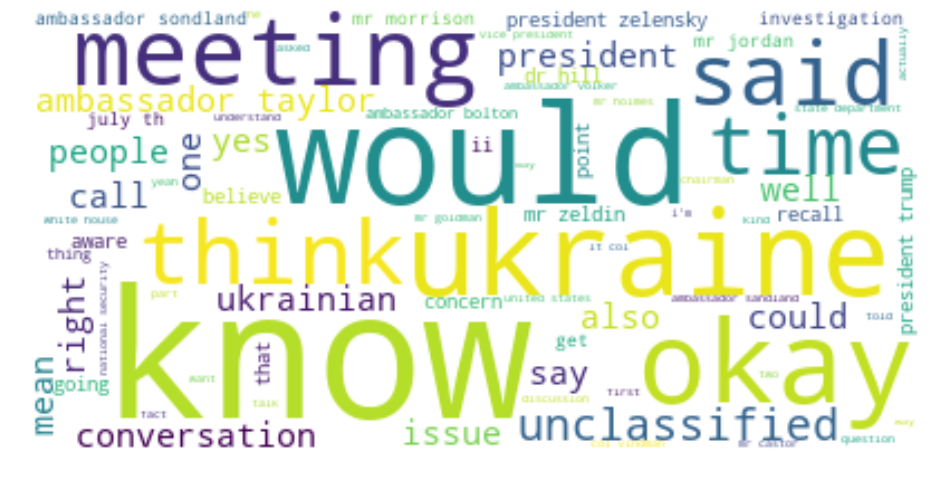

In [111]:
#creating the wordcloud from all testimony input
plt.figure(figsize=(16,13))
wordcloud(alltestclean)

In [10]:
#tokenize with spacy

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
nlp = spacy.load('en_core_web_md')
nlp.max_length = 2600000
alltestnlp = nlp(alltestclean)

#find the length
print (len(alltestnlp))

#check the outcome
print (alltestnlp[300:400])

592173
for complying with the duly authorized  congressional subpoena.  dr. hill has served with distinction in and out of  government, including as national intelligence officer for  russia and eu rasi a at the national intelligence council, as a  senior fellow with the brookings institution, and, most  recently, as deputy assistant to the president and senior  director for europe and russia on the nati onal security  council staff.  in her most recent work at the white house, dr. hill  held a unique


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = [alltestclean]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)


# summarize encoded vector
print(vector.shape)
print(type(vector))
alltestcv = (vector.toarray())
print (alltestcv[200:400])

{'unclassified': 10180, 'permanent': 7019, 'select': 8654, 'committee': 1680, 'on': 6571, 'intelligence': 4770, 'joint': 5006, 'with': 10743, 'the': 9721, 'oversight': 6813, 'and': 413, 'reform': 7947, 'foreign': 3737, 'affairs': 202, 'house': 4408, 'of': 6510, 'representatives': 8122, 'washington': 10582, 'deposition': 2448, 'fiona': 3644, 'hill': 4333, 'monday': 5911, 'october': 6501, 'in': 4569, 'above': 15, 'matter': 5651, 'was': 10580, 'held': 4277, 'room': 8361, 'hvc': 4443, 'capitol': 1265, 'visitor': 10501, 'center': 1346, 'commencing': 1658, 'at': 705, 'present': 7370, 'schiff': 8554, 'carson': 1293, 'swalwell': 9503, 'heck': 4270, 'also': 342, 'raskin': 7750, 'rouda': 8380, 'rooney': 8363, 'jordan': 5015, 'zeldin': 10892, 'perry': 7033, 'gaetz': 3894, 'unclassif': 10176, 'ied': 4468, 'appearances': 509, 'for': 3728, 'commi': 1670, 'ttee': 10057, 'samuels': 8493, 'ungar': 10252, 'lee': 5298, 'wolosky': 10761, 'boies': 1035, 'schiller': 8555, 'flexner': 3683, 'llp': 5441, 'new'


(1, 10911)
<class 'scipy.sparse.csr.csr_matrix'>
[]


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = [alltestclean]
# create the transform
vectorizer = TfidfVectorizer(max_features=2000, 
                             stop_words=stopwords) 
# tokenize and build vocab
vectorizer.fit_transform(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
alltestvec = vectorizer.transform([text[0]])
# summarize encoded vector
print(alltestvec.shape)
print(alltestvec.toarray())


{'unclassified': 1875, 'permanent': 1260, 'select': 1585, 'committee': 328, 'intelligence': 862, 'joint': 906, 'oversight': 1218, 'reform': 1455, 'foreign': 691, 'affairs': 35, 'house': 801, 'representatives': 1494, 'washington': 1931, 'deposition': 479, 'fiona': 671, 'hill': 785, 'monday': 1086, 'october': 1169, 'matter': 1033, 'held': 774, 'room': 1534, 'center': 263, 'present': 1319, 'schiff': 1565, 'swalwell': 1752, 'heck': 773, 'also': 62, 'raskin': 1409, 'rouda': 1535, 'jordan': 907, 'zeldin': 1996, 'perry': 1262, 'gaetz': 712, 'unclassif': 1874, 'ied': 810, 'appearances': 103, 'commi': 323, 'lee': 964, 'wolosky': 1965, 'new': 1129, 'york': 1992, 'chairman': 271, 'come': 316, 'order': 1206, 'good': 742, 'morning': 1090, 'dr': 533, 'welcome': 1939, 'along': 60, 'committees': 329, 'conducting': 355, 'investigation': 882, 'part': 1229, 'official': 1176, 'impeachment': 818, 'inquiry': 852, 'today': 1813, 'conducted': 354, 'ry': 1551, 'light': 984, 'attempts': 147, 'white': 1951, 'adm


[1. 1. 1. ... 1. 1. 1.]
(1, 2000)
[[0.00381642 0.0111557  0.00313142 ... 0.07446918 0.00998141 0.00489285]]


In [13]:
def topicinfo(sourcefile, topic):
    statements = textacy.extract.semistructured_statements(sourcefile, topic)
    # Print the results
    print("Here are the things I know about", topic,":")
    for statement in statements:
        subject, verb, fact = statement
        print(f" - {fact}")

In [149]:
topicinfo(alltestnlp, 'biden')

Here are the things I know about biden :
 -  on the board of
 - the point man for the obama  admi ni strati on wi th ukrai ne.	
 - part of the board of burisma
 - a board member of burisma
 - qualified for that position
 - on its board
 -  pushing the ukrainians very hard on corruption and the  allegation  you know the allegation
 - the top cover.  
 - the one  that communicated
 - on the board
 - on the board  of a company owned by somebody
 - on the board of an energy  company


In [193]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

In [202]:
lda_tfidf = LatentDirichletAllocation(n_components=5, random_state=42)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [203]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.109052 -0.016137       1        1  22.951541
1      0.130514  0.046341       2        1  20.321414
2      0.086135  0.242505       3        1  19.870843
0      0.045994 -0.302955       4        1  19.480124
4     -0.371694  0.030246       5        1  17.376078, topic_info=    Category        Freq          Term       Total  loglift  logprob
607  Default  415.000000  unclassified  415.000000  30.0000  30.0000
139  Default  223.000000           did  223.000000  29.0000  29.0000
253  Default  179.000000          hill  179.000000  28.0000  28.0000
435  Default  169.000000     president  169.000000  27.0000  27.0000
392  Default  151.000000          okay  151.000000  26.0000  26.0000
..       ...         ...           ...         ...      ...      ...
30    Topic5   33.171814           ask   37.695815   1.6222  -4.3957
544   Topic5   42.748166         staff   63.679930   1.3515  -4.1421
509   Topic5   40.719360     secretary   61.485117   1.3380  -4.1907
406   Topic5   68.468978        people  139.483385   1.0385  -3.6710
65    Topic5   20.962932       burisma   29.230359   1.4176  -4.8546

[236 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
6         1  0.263884        actually
6         2  0.362840        actually
6         3  0.285874        actually
6         5  0.087961        actually
7         3  0.959123  administration
...     ...       ...             ...
650       4  0.500133            yeah
654       1  0.991275             yes
655       2  0.972447     yovanovitch
656       4  0.990483          zeldin
657       3  0.981957        zelensky

[256 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1, 5])

In [188]:
X, _ = make_multilabel_classification(random_state=42)
lda_tfidf = LatentDirichletAllocation(n_components=3, random_state=42, n_jobs=-1, max_iter=100)
lda_tfidf.fit(X)
lda_tfidf2 = lda_tfidf.transform(X[-2:])
print(lda_tfidf2)

[[0.40311419 0.40904211 0.1878437 ]
 [0.72396333 0.06125923 0.21477744]]
